# ONI index: plot timeseries and get ENSO years

Last updated August 20 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ONI data for 1981-2017
# Specify the file path
file_path = './oni.data.txt'

# Read the text file using pandas
df = pd.read_csv(file_path, delimiter='  ', header=None,
                   names=['year','DJF','JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ'],
                  engine='python')  # Change delimiter if necessary

# Set the first column as the index
df.set_index('year', inplace=True)

# Convert the index to numeric values (this will convert any string that can be converted to a number)
df.index = pd.to_numeric(df.index, errors='coerce')

# Drop any rows where the index is NaN (non-numeric index values)
df.dropna(inplace=True)

# Convert the index to integers
df.index = df.index.astype(int)

## Plot timeseries (fig. 1)

In [3]:
# Now filter the DataFrame to keep only the rows with years between 1981 and 2017
df_filtered = df[(df.index >= 1981) & (df.index <= 2017)]

In [4]:
data_ts = df_filtered.stack().reset_index(drop=True)
data_ts = pd.to_numeric(data_ts, errors='coerce')

In [5]:
data_ts

0     -0.26
1     -0.50
2     -0.47
3     -0.37
4     -0.26
       ... 
439   -0.11
440   -0.38
441   -0.65
442   -0.84
443   -0.97
Length: 444, dtype: float64

(-3.0, 3.0)

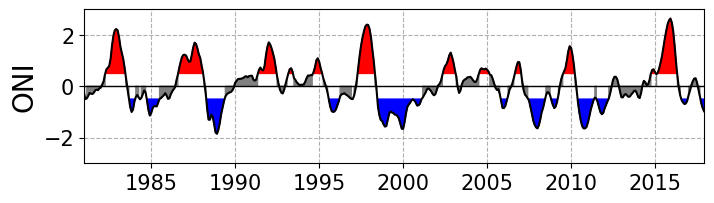

In [6]:
t = np.arange(1981,2018,1/12)
plt.figure(figsize=(8,2))
plt.plot(t,data_ts,color='k',zorder=3)
plt.grid(linestyle='--',zorder=0)
plt.fill_between(t,data_ts, 0.5, where=(data_ts >= 0.5), color='red', alpha=1, zorder=2)
plt.fill_between(t,data_ts, -0.5, where=(data_ts <= -0.5), color='b', alpha=1, zorder=2)
plt.fill_between(t,data_ts, 0, where=((data_ts > -0.5) & (data_ts < 0.5)), color='gray', alpha=1, zorder=2)

plt.axhline(0,color='k',linewidth=1,zorder=3)
plt.xlim(t.min(),t.max())
plt.ylabel('ONI',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-3,3)

# Get ENSO event years

In [7]:
# Now filter the DataFrame to keep only the rows with years between 1981 and 2017
df_filtered = df[(df.index >= 1979) & (df.index <= 2017)]

In [8]:
# Initialize a new DataFrame with the same index
categories = pd.DataFrame(index=df_filtered.index)

# Categorize into ElNino, LaNina, Neutral
categories['ElNino'] = (df_filtered['NDJ'] > 0.5).astype(int)
categories['LaNina'] = (df_filtered['NDJ'] < -0.5).astype(int)
categories['Neutral'] = ((df_filtered['NDJ'] >= -0.5) & (df_filtered['NDJ'] <= 0.5)).astype(int)

# Create shifted columns for 1 year after and fill NaNs with 0
categories['ElNino_1'] = categories['ElNino'].shift(1).fillna(0).astype(int)
categories['LaNina_1'] = categories['LaNina'].shift(1).fillna(0).astype(int)
categories['Neutral_1'] = categories['Neutral'].shift(1).fillna(0).astype(int)

# Create shifted columns for 2 years after and fill NaNs with 0
categories['ElNino_2'] = categories['ElNino'].shift(2).fillna(0).astype(int)
categories['LaNina_2'] = categories['LaNina'].shift(2).fillna(0).astype(int)
categories['Neutral_2'] = categories['Neutral'].shift(2).fillna(0).astype(int)

categories = categories[(categories.index >= 1981) & (categories.index <= 2017)]

categories

,ElNino,LaNina,Neutral,ElNino_1,LaNina_1,Neutral_1,ElNino_2,LaNina_2,Neutral_2
year,,,,,,,,,
1981,0,0,1,0,0,1,1,0,0
1982,1,0,0,0,0,1,0,0,1
1983,0,1,0,1,0,0,0,0,1
1984,0,1,0,0,1,0,1,0,0
1985,0,0,1,0,1,0,0,1,0
1986,1,0,0,0,0,1,0,1,0
1987,1,0,0,1,0,0,0,0,1
1988,0,1,0,1,0,0,1,0,0
1989,0,0,1,0,1,0,1,0,0


In [9]:
# save the data
categories.to_csv('ENSO_yrs_final.csv', index=True)